# Tarea 1
### Curso MA4702 año 2021.  Profesores Iván Rapaport y José Soto 

## Instrucciones

Esta tarea se debe realizar de manera **individual**.

El plazo de esta tarea es el día **siguiente** al laboratorio 1, es decir, el jueves 29 de abril a las 23:59

Debe entregar por ucursos un solo archivo Tarea.ipynb, al igual que en el laboratorio de prueba este archivo debe entregarse ejecutado por completo usando (Kernel-: Restart and Run All) y luego salvado al disco. El resultado de dicha ejecución es lo que debe entregar.


En esta tarea usted necesitará los paquetes siguientes
```
JuMP, Gurobi, Distances, Plots, StatsBase, DataFrames
```
(instálelos si no los tiene)


Instrucciones adicionales
1. Complete la celda de identificación
2. Resuelva los ejercicios 1 al 4
3. Una vez termine su tarea, ejecute el archivo jupyter completo usando (Kernel: Restart and Run All), o bien usando (Kernel: Restart and Clean Output) y luego ejecutando manualmente las celdas una a una en orden.
4. Fuarde el archivo resultado en un .ipynb. Ese es el archivo que debe entregar por ucursos.

NOTA IMPORTANTE:
Lea la tarea completa y trabaje con tiempo. Solo ejecutar las celdas ya completas le podría tomar varias decenas de minutos de cálculo.


# IDENTIFICACIÓN E INTRODUCCIÓN 

In [1]:
# Celda de identificación. tipee y ejecute esta celda (como código, no como Markdown)
Mi_Nombre = " Arturo Ignacio Lazcano González " # Escriba su nombre completo
@show(Mi_Nombre)
@show(Sys.BINDIR)
versioninfo()

Mi_Nombre = " Arturo Ignacio Lazcano González "
Sys.BINDIR = "C:\\Users\\artur\\AppData\\Local\\Programs\\Julia 1.5.4\\bin"
Julia Version 1.5.4
Commit 69fcb5745b (2021-03-11 19:13 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i5-7200U CPU @ 2.50GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-9.0.1 (ORCJIT, skylake)


In [ ]:
#paquetes a usar
# CELDA QUE NO SE CORRE PUES YA ESTÁN INSTALADOS LOS PAQUETES
import Pkg
Pkg.add("JuMP")
Pkg.add("Gurobi")
Pkg.add("Distances")
Pkg.add("Plots")
Pkg.add("StatsBase")
Pkg.add("DataFrames")
Pkg.add("Combinatorics")
using JuMP, Gurobi, Distances, Plots, StatsBase, DataFrames, Combinatorics #instale estos paquetes antes si no los tiene en su sistema.

In [2]:
using JuMP, Gurobi, Distances, Plots, StatsBase, DataFrames, Combinatorics #instale estos paquetes antes si no los tiene en su sistema.

Calcularemos emparejamientos mínimos de conjuntos de puntos en el plano.
Consideremos $N$ puntos en el plano (con $N$ par), determinados por su vector ```coordx``` de coordenadas x y su vector ```coordy``` de  coordenadas y.

La función ```distancias``` de la siguiente celda  calcula una matriz $w$ con las distancias entre los puntos  guardados en una matriz triangular superior, es decir $w[i,j]$ es la distancia entre el punto $i$ y el punto $j$  para todo $1\leq i<j\leq N$.

Los modelos devolverán vectores indexados por aristas que no son necesariamente enteros, por lo cual la función ```dibuja``` de la siguiente celda será util para dibujar y analizarlos. 

In [3]:
function distancias(coordx, coordy)
    N=length(coordx)
    w=zeros(N,N)
    for i in 1:N, j in i+1:N
        w[i,j]=euclidean([coordx[i],coordy[i]],[coordx[j],coordy[j]])
    end
    return w
end

function dibuja(coordx,coordy,arcos)
## Recibe dos arreglos de N valores donde (coordx[i],coordy[i]) son las coordenadas de la ciudad i
## Recibe además una matriz arcos de N x N, donde arcos[i,j] es el peso del arco [i,j]
## Dibuja los N puntos en el plano y dibuja los arcos con ancho de linea proporcional al peso.
    N=length(coordx)
    scatter(coordx,coordy,txt=text.(1:N,10,:bottom))
    for k in findall(!iszero, arcos)
        plot!([coordx[k[1]],coordx[k[2]]],[coordy[k[1]],coordy[k[2]]],arrow = false,lc=:blue, linewidth = 2*arcos[k[1],k[2]])
    end
    display(plot!(leg=false))
end


dibuja (generic function with 1 method)

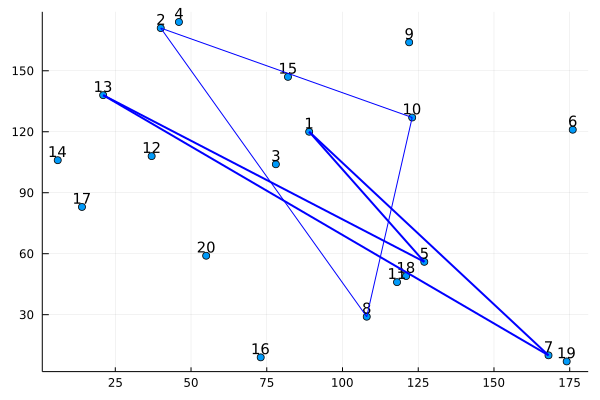

In [4]:
#Un ejemplo con 20 puntos aleatorios.
#Se dibujan las aristas (1,7),(7,13),(5,13),(1,5) con un peso de 1
# y las aristas (2,8), (2,10), (8,10) con un peso de 0.5


N=20
a = sample(1:200, 20, replace = false)
b = sample(1:200, 20, replace = false)
w = distancias(a,b)
scatter!(a,b)
ciclo_ejemplo=zeros(N,N)
ciclo_ejemplo[1,7]=1
ciclo_ejemplo[7,13]=1
ciclo_ejemplo[5,13]=1
ciclo_ejemplo[1,5]=1

ciclo_ejemplo[2,10]=0.5
ciclo_ejemplo[2,8]=0.5
ciclo_ejemplo[8,10]=0.5

dibuja(a,b,ciclo_ejemplo)

In [5]:
#imprimir la matriz de distancia w
w

20×20 Array{Float64,2}:
 0.0  70.7248  19.4165  69.029    74.4312  …   77.8781   141.4      69.8355
 0.0   0.0     77.026    6.7082  144.201      146.441    211.783   113.0
 0.0   0.0      0.0     76.9675   68.593       69.814    136.473    50.5371
 0.0   0.0      0.0      0.0     143.126      145.774    210.412   115.352
 0.0   0.0      0.0      0.0       0.0          9.21954   67.897    72.0625
 0.0   0.0      0.0      0.0       0.0     …   90.6035   114.018   135.96
 0.0   0.0      0.0      0.0       0.0         61.0737     6.7082  123.167
 0.0   0.0      0.0      0.0       0.0         23.8537    69.5701   60.9016
 0.0   0.0      0.0      0.0       0.0        115.004    165.387   124.555
 0.0   0.0      0.0      0.0       0.0         78.0256   130.388    96.1665
 0.0   0.0      0.0      0.0       0.0     …    4.24264   68.2422   64.3273
 0.0   0.0      0.0      0.0       0.0        102.65     170.206    52.2015
 0.0   0.0      0.0      0.0       0.0        133.869    201.42     86.0

***
***

En lo que sigue  $G=(V,E)$ es un grafo **completo** con $V=[N]$, Los siguientes cuatro modelos son modelos exactos (posiblemente extendidos y en el sentido de puntos extremos) para encontrar un emparejamiento de peso mínimo. Consideraremos $E=\{[i,j]\colon 1\leq i < j\leq N\}$.


\begin{align*}
\text{(M1)}\quad  \min \sum_{e\in E} x_ew_e\\
x(E) &= N/2\\
x_{e}+x_{f}&\leq 1, \forall e, f \in E\colon |e\cap f|=1\\
0\leq x_e&\leq 1, \forall e\in E\\
x_e&\in \mathbb{Z}, \forall e\in E\\
\mbox{}\\
\text{(M2)}\quad  \min \sum_{e\in E} x_ew_e\\
x(\delta(i))&= 1, \forall i\in V\\
x_e&\geq 0, \forall e\in E\\
x_e&\in \mathbb{Z}, \forall e\in E\\
\mbox{}\\
\text{(M3)}\quad  \min \sum_{e\in E} x_ew_e\\
x(\delta(i))&= 1, \forall i\in V\\
y(V)&=n/2\\
x_{ij}&\leq y_{i}+y_{j}, \forall e=ij \in E\\
x_{ij}&\leq 2-y_{i}+y_{j}, \forall e=ij \in E\\
x_e&\geq 0, \forall e\in E\\
0\leq y_v&\leq 1, \forall v\in V\\
y_v&\in \mathbb{Z}, \forall v\in V\\
\mbox{}\\
\text{(M4)}\quad  \min \sum_{e\in E} x_ew_e\\
x(E) &= N/2\\
x(E(S))&\leq \frac{|S|-1}{2}, \forall S\subseteq V, |S| \text{ impar}\\
0\leq x_e&\leq 1, \forall e\in E\\
\end{align*}

Los 4 modelos son bastante distintos entre sí. 

El primer modelo es un PLE con $m=\Theta(N^2)$ variables enteras y $\Theta(N^3)$ restricciones.

El segundo modelo es un PLE con $m=\Theta(N^2)$ variables enteras y $\Theta(N)$ restricciones (ignorando cotas).

El tercer modelo es un PL Mixto con $m=\Theta(N^2)$ variables continuas, $N$ variables enteras y $\Theta(N^2)$ restricciones.

El cuarto modelo es un PL puro con  $m=\Theta(N^2)$ variables continuas  y $\Theta(2^N)$ restricciones. Un teorema de Edmonds garantiza que los puntos extremos de (M4) son exactamente matchings perfectos.



# Ejercicio 1. Responder en Markdown.

En clases vimos que los modelos 1 y 2 son exactos. El modelo 4 también es exacto (en el sentido integral) y con formulación ideal (es decir, los puntos enteros de la formulación corresponden exactamente a matching perfectos y viceversa).

Veamos que el modelo 3 es, en cierto modo, también un modelo (extendido) exacto con buena formulación.

Demuestre las siguientes propiedades del modelo 3 en las siguientes celdas (usando markdown para formatear)

1.1: Para todo  matching perfecto $M$ existen variables $(x, y)$ factibles tal que $M$ está representado por $x$. Explique el rol de la variable $y$. 

1.2: Demuestre que para todo punto $(x,y)$ factible en (M3), $x$ es la indicatriz de un matching perfecto.

1.3: Demuestre que para todo $(x,y)$ factible en (M3), existe un $x'$ entero tal que  $(x',y)$ es factible en (M3) de igual valor objetivo que $(x,y)$. Concluya que todo óptimo de (M3) se puede transformar en un matching perfecto de costo mínimo.


## Solución al ejercicio 1.1

Considerando un matching perfecto $M$, y teniendo en cuenta la definición de las variables $(x,y)$ como vectores de coordenadas, podemos notar que la variable $x$ la podemos tomar como la indicatriz de las mismas aristas del matching, y la variable $y$ como la miad de los vértices del grafo pero, ¿Qué vértices?.

Recordando que un matching perfecto crea un subgrafo de $G$ bipartito, supongamos bipartito con conjuntos de vértices $L,R$, podemos tomar spg el conjunto $L$ como la variable $y$. Veamos que este par $(x,y)$ cumple las restriccionees del modelo:

1) $x(\delta(i))=1$ claramente pues, si $e=ij \in M$, entonces i (o j) solo tiene 1 arista que sale de ese vértice ya que $M$ es matching.

2) $y(V)=n/2$, esto igual se ve claramente ya que $M$ es un matching perfecto y tomando todo el conjunto del grafo bipartito formado nos quedamos con n/2 vértices.

3) $x_{ij} \leq y_i + y_j$ se cumple para todo $e=ij \in E$ pues, el único caso en que esto no se cumpla es que $x_{ij}$ sea 0 e $y_i o y_j$ sea 1, pero esto no tiene sentido pues eso querría decir que hay un vértice que el matching no está tocando y sería contradicción.

4) $x_{ij} \leq 2 - y_i - y_j$ se cumple para todo $e=ij \in E$ pues, para $x_{ij}=1$ en la definición que establecimos para $y$, solo un vértice de cada arista en el matching está en $y$, por lo tanto el valor de $y_i o y_j$ sería 0, el caso $x_{ij}=0$ es directo.

5) $x_e \geq 0$ por definición al ser una indicatriz.

6) $0 \leq y_v \leq 1$ es directo pues es una indicatriz de vértices en el matching.

7) $y_v \in \mathbb{Z}$ por la definición (mismo argumento que (6)).


## Solución al ejercicio 1.2

Veamos que las restricciones para $(x,y)$ factible entero indican que x es la indicatriz de un matching perfecto.
En efecto, la primera restricción, junto con que $N$ es par y el grafo es completo, dice que cada vértice $v$ tiene 1 y sólo 1 arista conectada $\forall v \in V$ por lo tanto necesariamente tiene que ser un matching, y este es perfecto pues como el conjunto de vértices es par, no hay ninguno que no conecte con otro por una arista.  

Esto también sale por las consecuencias vista en el curso de Algoritmos Combinatoriales sobre el teorema de Hall.

## Solución al ejercicio 1.3

Observando las restricciones del modelo, notamos que sólo la 1,3,4,5 afectan al vector $x$. Por otro lado, la primera y quinta restricción no dicen mucho sobre la naturaleza de $x$, es decir, independiente de que sea racional, será mayor o igual que 0 y cumplirá $x(\delta(i))=1$.  
Esto nos deja que las restricciones importantes son:  
1) $x_{ij} \leq y_i+y_j$ para todo $e=ij \in E$  
2) $x_{ij} \leq 2-y_i-y_j$ para todo $e=ij \in E$  

Si suponemos $x$ racional >0, vemos que 1) y 2) se cumplirían al ser este un punto factible, pero dada la función objetivo, y la idea de querer minimizar el valor $\sum x_ew_e$, tenemos que un punto $x_e'=0$ en algunas coordenadas seguirían cumpliendo todas las restricciones necesarias y así, el valor objetivo en esa arista sería sumar 0, por lo cual este puto factible entero $(x',y)$ tendría menor o igual valor objetivo.

Con lo demostrado anteriormente, y usando el resultado de 1.2, tendremos que para cada punto factible $(x,y)$, existe un punto factible entero $(x',y)$ tal que tiene menor o igual valor objetivo, donde $x'$ sería la indicatriz de un matching perfecto, y como la función objetivo es minimizar costo, este problema pasa a ser un problema de matchings de costo mínimo.

# Ejercicio 2. En Julia.

Escriba una función 
```julia
emparejamiento(num_modelo, N, w) 
return modelo
```

que reciba como entrada:
```julia
num_modelo: entero en {1,2,3,4} que representa si se trabaja con M1, M2, M3 o M4.
N: número de vértices del grafo
w: matriz de pesos
```
y entregue el modelo en juMP/Gurobi asociado al grafo entregado.


Indicación:
Le recomendamos escribir uno de los modelos primero y seguir con los otros ejercicios, para que pueda probarlo. 
Una vez que esté listo, escriba los demás modelos.


In [6]:
# Escriba su respuesta aquí
# Esconda la salida de Gurobi escribiendo el comando


function emparejamiento(num_modelo, N, w)
    E=powerset(1:N,2,2)
    if num_modelo==1 #MODELO 1
        return primerModelo(N,w,E)
    end
    if num_modelo==2 #MODELO 2
        return modelo2(N,w,E)
    end
    if num_modelo==3 #MODELO 3
        return modelo3(N,w,E)
    end
    if num_modelo==4 #MODELO 4
        return modelo4(N,w,E)
    end
end
# las 2 celdas siguientes contiene un ejemplo que puede usarlo para probar su método 

emparejamiento (generic function with 1 method)

In [7]:
function primerModelo(N,w,E)
    mimodelo=Model()
    set_optimizer(mimodelo, Gurobi.Optimizer)
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E]<=1, Int)
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    @constraint(mimodelo, sum(x[e[1], e[2]] for e in E) == N/2)
    for e in E
        for f in E
            if length(intersect(e,f))==1
                @constraint(mimodelo, x[e[1], e[2]] + x[f[1], f[2]] <=1)
            end    
        end
    end
    return mimodelo
end

primerModelo (generic function with 1 method)

In [8]:
function modelo2(N,w,E)
    mimodelo=Model()
    set_optimizer(mimodelo, Gurobi.Optimizer)
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E], Int)
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    V=powerset(1:N,1,1)
    for v in V
        @constraint(mimodelo,(sum(x[e[1],e[2]] for e in E if e[1]==v[1] || e[2]==v[1]))==1)
    end
    return mimodelo
end

modelo2 (generic function with 1 method)

In [9]:
function modelo3(N,w,E)    
    mimodelo=Model()
    set_optimizer(mimodelo, Gurobi.Optimizer)
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E])
    @variable(mimodelo, 0<=y[i in 1:N]<=1, Int)
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    V=powerset(1:N,1,1)
    for v in V
        @constraint(mimodelo,(sum(x[e[1],e[2]] for e in E if e[1]==v[1] || e[2]==v[1]))==1)
    end
    @constraint(mimodelo, sum(y[v] for v in 1:N) == N/2)
    for e in E
        @constraint(mimodelo, x[e[1], e[2]] <= y[e[1]]+y[e[2]])
        @constraint(mimodelo, x[e[1], e[2]] <= 2-y[e[1]]+y[e[2]])
    end
    return mimodelo  
end

modelo3 (generic function with 1 method)

In [10]:
function modelo4(N,w,E)
    mimodelo=Model()
    set_optimizer(mimodelo, Gurobi.Optimizer)
    set_optimizer_attributes(mimodelo, "OutputFlag" => 0, "TimeLimit" => 80)
    @variable(mimodelo, 0<=x[i in 1:N,j in 1:N; [i,j] in E]<=1)
    @objective(mimodelo, Min, sum(x[e[1],e[2]]*w[e[1],e[2]] for e in E))
    @constraint(mimodelo, sum(x[e[1], e[2]] for e in E) == N/2)
    for S in powerset(1:N,1,N-1)
        if length(S)%2==1
            @constraint(mimodelo, sum(x[e[1], e[2]] for e in E if (e[1] in S && e[2] in S)) <= (length(S) - 1)/2)
        end
    end
    return mimodelo
end

modelo4 (generic function with 1 method)

In [11]:
# Celda para probar el método anterior
N=6
a = [63, 114, 165, 14, 140, 180]
b = [174, 133, 54, 87, 47, 35]
w = distancias(a,b)
num_mod=1 # o el modelo que desee probar
modelo1=emparejamiento(num_mod, N, w)
optimize!(modelo1)
@show(objective_value(modelo1))
@show(JuMP.simplex_iterations(modelo1))
@show(JuMP.node_count(modelo1));

#Nota: El valor objetivo debería ser alrededor de 213.9016339...

Academic license - for non-commercial use only - expires 2021-06-21
objective_value(modelo1) = 213.90163398561813
JuMP.simplex_iterations(modelo1) = 7.0
JuMP.node_count(modelo1) = 1.0


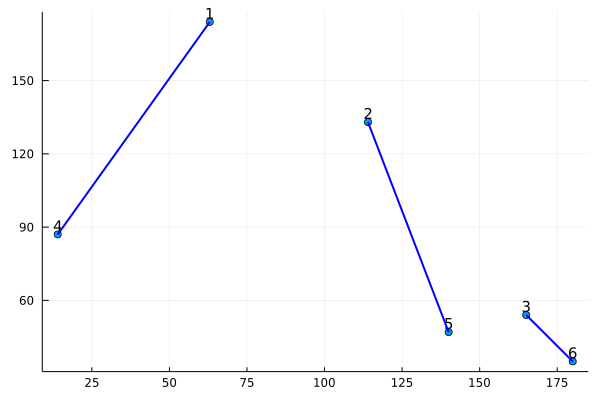

In [12]:
# Celda para dibujar el matching encontrado
X = zeros(N,N)
for i in 1:N, j in 1:N
    if i<j
    X[i,j]=value(modelo1[:x][i,j])
    end
end
dibuja(a,b,X)

# Ejercicio 3. En Julia

Parte 1. Escriba una función test_matching(N_MAX) que realice lo siguiente.

1. Genere una instancia aleatoria (N, coordX,coordY,w) para cada N par entre 6 y N_MAX 
   donde coordX, coordY son puntos de la grilla 1:200 por 1:200 y w es su matriz de distancia.
   (el comando sample(1:200, N, replace = false) entrega N enteros entre 1 y 200 sin repetición)
   
   Nota: Guarde las instancias creadas en un arreglo (en el formato que usted desee), durante su ejecución pues debe retornarlas al final. 

2. Para cada instancia (N,coordX,coordY,w) de su lista y cada modelo (num_mod), calcule y guarde los siguientes valores:
    1. Valor de N
    2. valor de num_mod
    3. Numero de variables del modelo (busque el comando en la documentación de JuMP)
    4. Numero de restricciones del modelo (busque el comando en la documentación de JuMP)
    5. Tiempo de creación del modelo a partir de (N,coordX,coordY,w).   
    
            NOTA: Investigue el comando @elapse. Por ejemplo, ejecute
            A=@elapse B = 100*20; A,B; 
    6. Tiempo de resolución del modelo creado.
    7. Valor objetivo encontrado (si logró terminar, si no, entregar 0).
    
            NOTA: Debe testear si el modelo termina de ejecutar usando termination_status
            
    8. Numero de iteraciones de simplex realizadas (JuMP.simplex_iterations(nombre_modelo))
    9. Numero de nodos BnB realizados (JuMP.node_count(nombre_modelo))
   
   Luego elimine integralidad de las variables del modelo, resuelva nuevamente y calcule
   
    10. Tiempo de resolución del modelo fraccional 
    11. Valor objetivo encontrado (si logró terminar, si no, entregar 0)
    12. Numero de iteraciones de simplex realizadas
    
3. Retorne un par INSTANCIAS, TABLA 

Parte 2. Cuando termine su función ejecute test_matching(8) y test_matching(20), mostrando la TABLA creada. 
NOTA: la última tabla debería tener 80 filas.

Parte 3. (opcional) Si su computador logra tiempos razonables sin quedarse sin memoria, ejecute test con el número más alto que pueda correr. 

Sugerencia: Un formato razonable de tabla es el de la siguiente celda


In [13]:
ENV["COLUMNS"]=200
df=DataFrame(
    :N                 => Int64[],
    :num_modelo        => Int64[],
    :variables         => Int64[],
    :restricciones     => Int64[],
    :t_creacion_ent    => Float64[],
    :t_resolucion_ent  => Float64[],
    :valor_ent         => Float64[],
    :simplex_ent       => Int64[],
    :nodos_bnb         => Int64[],
    :t_resolucion_frac => Float64[],
    :valor_frac        => Float64[],
    :simplex_frac      => Int64[]) 
push!(df,[6, 1, 18, 60, 0.55, 1.223, 14.4, 10, 7, 2, 0.33, 5])

,N,num_modelo,variables,restricciones,t_creacion_ent,t_resolucion_ent,valor_ent,simplex_ent,nodos_bnb,t_resolucion_frac,valor_frac,simplex_frac
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Int64
1,6,1,18,60,0.55,1.223,14.4,10,7,2.0,0.33,5


In [14]:
# Escriba su función acá
ENV["COLUMNS"]=120
function test_matching(N_MAX)
    INSTANCIAS=[]
    for N in Array(6:N_MAX)
        if N%2==0
            coordX=sample(1:200, N, replace = false)
            coordY=sample(1:200, N, replace = false)
            w=distancias(coordX,coordY)
            ia=[N,coordX,coordY,w]
            append!(INSTANCIAS, [ia])
        end
    end
    TABLA=DataFrame(
    :N                 => Int64[],
    :num_modelo        => Int64[],
    :variables         => Int64[],
    :restricciones     => Int64[],
    :t_creacion_ent    => Float64[],
    :t_resolucion_ent  => Float64[],
    :valor_ent         => Float64[],
    :simplex_ent       => Int64[],
    :nodos_bnb         => Int64[],
    :t_resolucion_frac => Float64[],
    :valor_frac        => Float64[],
    :simplex_frac      => Int64[]) 
    for i in INSTANCIAS
        for num_mod in [1,2,3,4]
            modelo=emparejamiento(num_mod, i[1], i[4])
            nv=num_variables(modelo)
            nc=num_constraints(modelo,AffExpr,MOI.EqualTo{Float64})+num_constraints(modelo,AffExpr,MOI.LessThan{Float64})+num_constraints(modelo,AffExpr,MOI.GreaterThan{Float64})+num_constraints(modelo,VariableRef,MOI.EqualTo{Float64})+num_constraints(modelo,VariableRef,MOI.LessThan{Float64})+num_constraints(modelo,VariableRef,MOI.GreaterThan{Float64})+num_constraints(modelo,VariableRef,MOI.Integer)
            tc=@elapsed B = emparejamiento(num_mod, i[1], i[4]) ; tc,B;
            tr=@elapsed optimize!(modelo)
            if termination_status(modelo)==MOI.OPTIMAL
                vo=objective_value(modelo)
            else
                vo=0
            end
            ni=JuMP.simplex_iterations(modelo)
            nn=JuMP.node_count(modelo)
            if num_mod==1 || num_mod==2
                for t in modelo[:x]
                    unset_integer(t)
                end
            end
            if num_mod==3
                for t in modelo[:y]
                    unset_integer(t)
                end
            end
            trf=@elapsed optimize!(modelo)
            vof=objective_value(modelo)
            nif=JuMP.simplex_iterations(modelo)        
            push!(TABLA,[i[1], num_mod, nv, nc, tc, tr, vo, ni, nn, trf, vof, nif])
        end
    end
    return INSTANCIAS, TABLA 
end    

test_matching (generic function with 1 method)

In [15]:
ENV["COLUMNS"]=200

200

In [16]:
ENV["LINES"]=200

200

In [17]:
# Pruebe su función acá
INSTANCIAS8, TABLA8 = test_matching(8);
TABLA8

Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only -

,N,num_modelo,variables,restricciones,t_creacion_ent,t_resolucion_ent,valor_ent,simplex_ent,nodos_bnb,t_resolucion_frac,valor_frac,simplex_frac
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Int64
1,6,1,15,166,0.0035496,0.0017067,168.849,5,0,0.000713999,164.411,6
2,6,2,15,36,0.0023071,0.0012806,168.849,5,0,0.0002483,168.849,4
3,6,3,21,70,0.0024094,0.0014482,168.849,8,0,0.000377,168.849,7
4,6,4,15,63,0.0024734,0.000737001,168.849,3,0,4.7101e-5,168.849,0
5,8,1,28,421,0.0034857,0.003688,167.57,10,1,0.0006303,89.2441,8
6,8,2,28,64,0.0024452,0.0034323,167.57,10,1,0.000293601,163.694,8
7,8,3,36,117,0.0022875,0.0179198,167.57,48,15,0.000627599,163.694,13
8,8,4,28,185,0.0031693,0.0020444,167.57,10,0,4.97e-5,167.57,0


In [18]:
# Pruebe su función acá
INSTANCIAS20, TABLA20 = test_matching(20);
TABLA20

Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only -

,N,num_modelo,variables,restricciones,t_creacion_ent,t_resolucion_ent,valor_ent,simplex_ent,nodos_bnb,t_resolucion_frac,valor_frac,simplex_frac
,Int64,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Int64,Float64,Float64,Int64
1,6,1,15,166,0.0047323,0.0024239,127.862,1,0,0.0005035,127.862,1
2,6,2,15,36,0.0034164,0.002366,127.862,3,0,0.0005353,127.862,2
3,6,3,21,70,0.0041808,0.0016811,127.862,5,0,0.000395001,127.862,5
4,6,4,15,63,0.0027812,0.001042,127.862,1,0,4.5299e-5,127.862,0
5,8,1,28,421,0.0070993,0.005039,220.608,11,1,0.0010546,150.993,8
6,8,2,28,64,0.002975,0.002463,220.608,10,1,0.000446501,199.5,7
7,8,3,36,117,0.0054743,0.0213847,220.608,125,49,0.0005408,199.5,12
8,8,4,28,185,0.0030625,0.0011901,220.608,9,0,4.55e-5,220.608,0
9,10,1,45,856,0.0055206,0.003965,309.838,19,1,0.0010003,235.377,14


In [19]:
# Pruebe su función acá con el valor más grande que pueda.

# EL COMPUTADOR TOMÓ MUCHO TIEMPO PARA NÚMEROS MÁS GRANDES

# Ejercicio 4. En Julia y en Markdown

Se sabe que los modelos 1 al 3 requieren de sus condiciones de integralidad.
Busque, ya sea en las instancias generadas al azar de la parte anterior, o en otras que genere usted 
una instancia donde las versiones fraccionales de los 4 modelos sean lo más distintas posibles (en valor objetivo)

Muestre los valores objetivos y dibuje los puntos fraccionales (solo la parte que corresponde a x) optimos asociados a los 4 modelos.

Además, responda a  las siguientes preguntas abiertas:
¿Puede encontrar una instancia donde los 4 valores difieran? (Justifique)
¿Qué modelo tiene el menor valor objetivo, el segundo, el tercero y el cuarto? ¿Deben siempre estar en este orden? (Justifique su respuesta) 

In [20]:
# instancia encontrada (escribala aquí, debe ser fija, no generada aleatoriamente cada vez que corra el código)
N=20
coordx=Array([142,71,177,190,105, 19, 62,115, 85,2,181,58,118,75,113,180,185,128,197,88])
coordy=Array([98,193,189,197,174,187,142, 15,144,151,128,132,140,5, 29, 38,178,113, 51,167])

# Resuelva la instancia con los 4 modelos (recuerde quitar la integralidad)
res=[]
modelos=[]
w=distancias(coordx,coordy)
df=DataFrame(
    :valor_objetivo_fraccional    => Float64[])
for num_mod in [1,2,3,4]
    if num_mod==1 || num_mod==2
        modelo=emparejamiento(num_mod,N,w)
        for t in modelo[:x]
            unset_integer(t)
        end
        optimize!(modelo)
        r=objective_value(modelo)
        append!(modelos,[modelo])
        append!(res,r)
    end
    if num_mod==3
        modelo=emparejamiento(num_mod,N,w)
        for t in modelo[:y]
            unset_integer(t)
        end
        optimize!(modelo)
        r=objective_value(modelo)
        append!(modelos,[modelo])
        append!(res,r)
    end
    if num_mod==4
        modelo=emparejamiento(num_mod,N,w)
        optimize!(modelo)
        r=objective_value(modelo)
        append!(modelos,[modelo])        
        append!(res,r)
    end
    push!(df,[res[num_mod]])
end
# Muestre una tabla con valores objetivos
df

Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21
Academic license - for non-commercial use only - expires 2021-06-21


,valor_objetivo_fraccional
,Float64
1,238.699
2,285.525
3,285.525
4,344.421


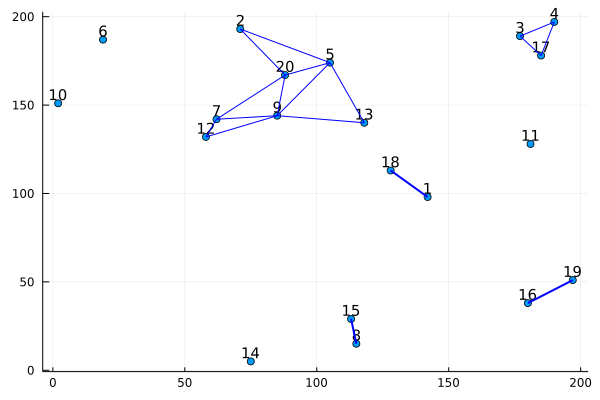

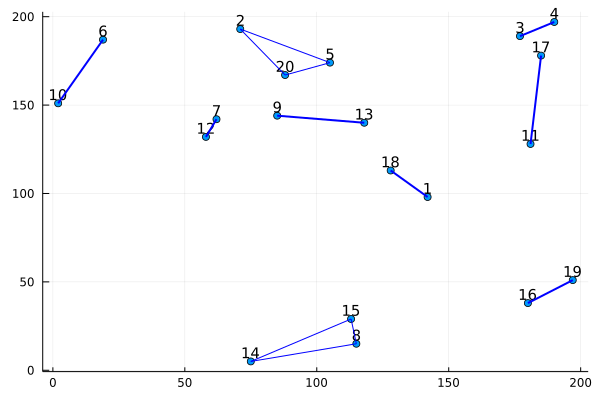

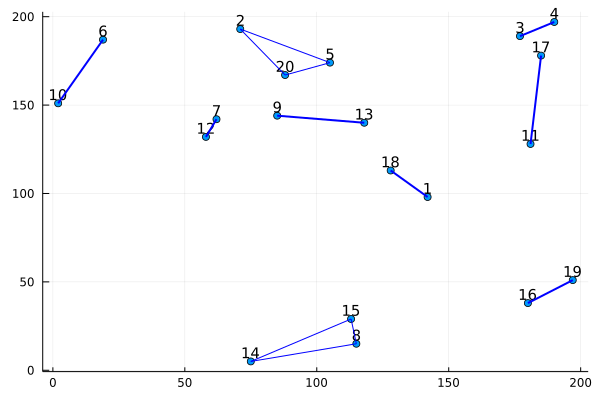

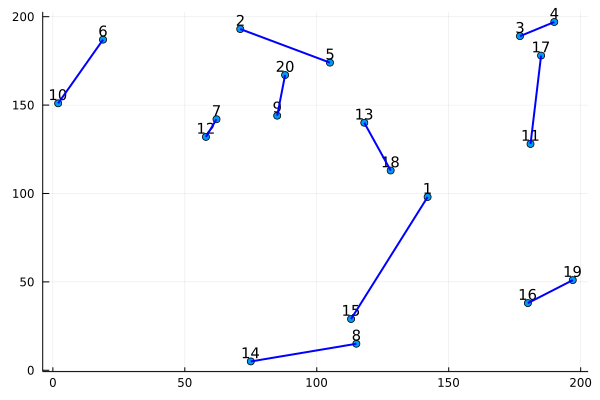

In [21]:
#dibujos para las 4 soluciones fraccionales encontradas
X = zeros(N,N)
for num in [1,2,3,4]
    for i in 1:N, j in 1:N
        if i<j
        X[i,j]=value(modelos[num][:x][i,j])
        end
    end
    dibuja(coordx,coordy,X)
end

Respuesta a las preguntas abiertas.
..


1) En las instancias generadas, no se encontró ninguna en la que los 4 modelos tengan distinto valor objetivo. Esto se debe a que el modelo 3 y 4 caracterizan el mismo poliedro en sus restricciones, por lo cual siempre tendrán el mismo resultado.

2) En las busquedas de instancias donde los modelos difieran en el resultado, el modelo con menor valor objetivo fue el primero (M1), el segundo y el tercer modelo (M2 y M3) tienen el mimso valor, y el cuarto (M4) es el que obtiene mayor valor. Esto suponiendo que la idea es buscar instancias que generen hartas diferencias, pues hay algunas en las que los 4 modelos obtienen el mismo resultado.
En resumen, $valor(M1) \leq valor(M2) = valor(M3) \leq valor(M4) $

3) En la práctica siempre se mantiene el orden nombrado anteriormente, esto se debe a la misma justificación de la parte 1), es decir, los poliedros definidos en los 4 modelos son tal que el primero llega a valores factibles menores que todos los otros, mientras que el modelo 4 (M4) es el más restricción tiene en ese sentido. 